In [1]:
import os
import sys
import subprocess

import numpy as np
import pandas as pd

from io import StringIO

os.getcwd()

'/home/yotamfr/development/skempi/src'

/home/yotamfr/development/skempi/skempi2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


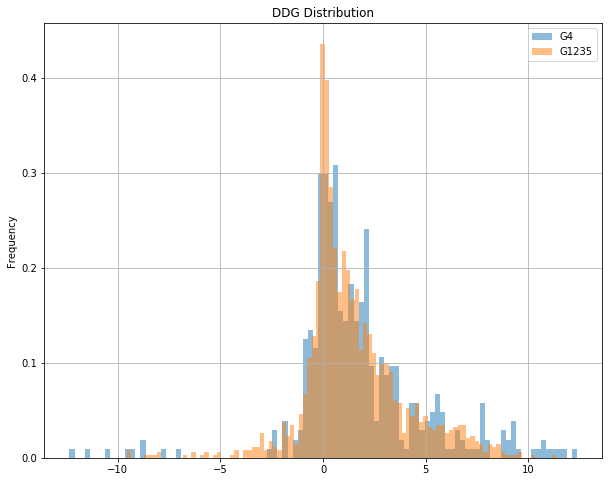

In [2]:
from skempi_consts import *
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload   
%autoreload 2

import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

df = skempi_df
ddg1 = df[df.Protein.isin(G1)].DDG.values
ddg2 = df[df.Protein.isin(G2)].DDG.values
ddg3 = df[df.Protein.isin(G3)].DDG.values
ddg4 = df[df.Protein.isin(G4)].DDG.values
ddg5 = df[df.Protein.isin(G5)].DDG.values

ddg1235 = df[df.Protein.isin(G1 + G2 + G3 + G5)].DDG.values

# plt.hist(ddg1, bins=100, alpha=0.5, label="G1", normed=1, cumulative=False, histtype='bar')
# plt.hist(ddg2, bins=100, alpha=0.5, label="G2", normed=1, cumulative=False, histtype='bar')
# plt.hist(ddg3, bins=100, alpha=0.5, label="G3", normed=1, cumulative=False, histtype='bar')
plt.hist(ddg4, bins=100, alpha=0.5, label="G4", normed=1, cumulative=False, histtype='bar')
# plt.hist(ddg5, bins=100, alpha=0.5, label="G5", normed=1, cumulative=False, histtype='bar')

plt.hist(ddg1235, bins=100, alpha=0.5, label="G1235", normed=1, cumulative=False, histtype='bar')

plt.legend(loc='upper right')
plt.title("DDG Distribution")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [3]:
skempi_df.head()

,Protein,Mutation(s)_PDB,Mutation(s)_cleaned,Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_wt (M),DDG,Reference,...,Temperature,kon_mut (M^(-1)s^(-1)),kon_wt (M^(-1)s^(-1)),koff_mut (s^(-1)),koff_wt (s^(-1)),dH_mut (kcal mol^(-1)),dH_wt (kcal mol^(-1)),dS_mut (cal mol^(-1) K^(-1)),dS_wt (cal mol^(-1) K^(-1)),Notes
0,1CSE_E_I,LI45G,LI38G,COR,PI,PI,5.260000e-11,1.120000e-12,2.280577,9048543,...,294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1CSE_E_I,LI45S,LI38S,COR,PI,PI,8.330000e-12,1.120000e-12,1.188776,9048543,...,294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1CSE_E_I,LI45P,LI38P,COR,PI,PI,1.020000e-07,1.120000e-12,6.765446,9048543,...,294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1CSE_E_I,LI45I,LI38I,COR,PI,PI,1.720000e-10,1.120000e-12,2.982502,9048543,...,294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1CSE_E_I,LI45D,LI38D,COR,PI,PI,1.920000e-09,1.120000e-12,4.411843,9048543,...,294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
from skempi_utils import *
import skempi_consts as consts

In [5]:
num_mut = 0
pbar = tqdm(range(len(skempi_df)), desc="row processed")
for i, row in skempi_df.iterrows():
    num_mut += len(row["Mutation(s)_cleaned"].split(','))
    pbar.update(1)
pbar.close()
num_mut

row processed: 100%|██████████| 3047/3047 [00:00<00:00, 8695.48it/s]


5177

In [6]:
from scipy.stats import pearsonr
all_features = {}

In [7]:
def get_temperature_array(records, agg=np.min):
    arr = []
    pbar = tqdm(range(len(skempi_df)), desc="row processed")
    for i, row in skempi_df.iterrows():
        arr_obs_mut = []
        for mutation in row["Mutation(s)_cleaned"].split(','):
            mut = Mutation(mutation)
            res_i, chain_id = mut.i, mut.chain_id
            t = tuple(row.Protein.split('_'))
            skempi_record = records[t]
            res = skempi_record[chain_id][res_i]
            temps = [a.temp for a in res.atoms]
            arr_obs_mut.append(np.mean(temps))
        arr.append(agg(arr_obs_mut))
        pbar.update(1)
    pbar.close()
    return arr

skempi_records = load_skempi_structs(pdb_path="../data/pdbs_n", compute_dist_mat=True)
all_features["B-factor"] = temp_arr = get_temperature_array(skempi_records, agg=np.min)
pearsonr(temp_arr, skempi_df.DDG)

row processed: 100%|██████████| 3047/3047 [00:00<00:00, 4067.88it/s]


(-0.26127841191178325, 9.7224897486097619e-49)

In [8]:
from aaindex import *
B = BLOSUM62
C = SKOJ970101

In [9]:
skempi_records = load_skempi_structs(pdb_path="../data/pdbs", compute_dist_mat=True)

skempi structures processed: 100%|██████████| 158/158 [02:46<00:00,  1.05s/it]


In [10]:
def comp_ei(mut, skempi_record, B, radius):
    P = skempi_record.get_profile(mut.chain_id)
    return EI(mut.m, mut.w, P, mut.i, B)


def comp_cp(mut, skempi_record, C, radius):
    return CP(mut, skempi_record, C, radius)


def get_ddg_ei_cp_arrays(M, func, radius=None):
    arr_ddg = []
    arr_obs = []
    pbar = tqdm(range(len(skempi_df)), desc="row processed")
    for i, row in skempi_df.iterrows():
        ddg = row.DDG
        arr_ddg.append(ddg)
        arr_obs_mut = []
        for mutation in row["Mutation(s)_cleaned"].split(','):
            mut = Mutation(mutation)
            t = tuple(row.Protein.split('_'))
            skempi_record = skempi_records[t]
            obs = func(mut, skempi_record, M, radius)
            arr_obs_mut.append(obs)
        arr_obs.append(np.sum(arr_obs_mut))
        pbar.update(1)
    pbar.close()
    return arr_ddg, arr_obs

In [11]:
from itertools import product

def grid_search_cp(matrices=[SKOJ970101, BASU010101], radiuses=[4, 5, 6, 7, 8, 9, 10]):
    res_dict = {}
    for C, angs in product(matrices, radiuses):
        key = (str(C), angs)
        arr_ddg, arr_cp = get_ddg_ei_cp_arrays(C, comp_cp, angs)
        res_dict[key] = (arr_ddg, arr_cp)
        cor_cp = pearsonr(arr_ddg, arr_cp)
        print("%s: CP: %s" % (key, cor_cp,))
    return res_dict

def grid_search_ei(matrices=[BLOSUM62, SKOJ970101, BASU010101]):
    res_dict = {}
    for B in matrices:
        key = str(B)
        arr_ddg, arr_ei = get_ddg_ei_cp_arrays(B, comp_ei)
        res_dict[key] = (arr_ddg, arr_ei)
        cor_ei = pearsonr(arr_ddg, arr_ei)
        print("%s: EI: %s" % (key, cor_ei,))
    return res_dict

In [12]:
# cps = grid_search_cp()

In [13]:
def comp_cp_a_b(mut, skempi_record, C, radius):
    return CP_A_B(mut, skempi_record, C, radius)


def get_ddg_cp_a_b_arrays(M, func, radius=None):
    arr_ddg = []
    arr_obs_a = []
    arr_obs_b = []
    pbar = tqdm(range(len(skempi_df)), desc="row processed")
    for i, row in skempi_df.iterrows():
        ddg = row.DDG
        arr_ddg.append(ddg)
        arr_obs_mut_a = []
        arr_obs_mut_b = []
        for mutation in row["Mutation(s)_cleaned"].split(','):
            mut = Mutation(mutation)
            t = tuple(row.Protein.split('_'))
            skempi_record = skempi_records[t]
            obs_a, obs_b = func(mut, skempi_record, M, radius)
            arr_obs_mut_a.append(obs_a)
            arr_obs_mut_b.append(obs_b)
        arr_obs_a.append(np.sum(arr_obs_mut_a))
        arr_obs_b.append(np.sum(arr_obs_mut_b))
        pbar.update(1)
    pbar.close()
    return arr_ddg, arr_obs_a, arr_obs_b


def grid_search_cp_a_b(matrices=[SKOJ970101, BASU010101], radiuses=[4, 5, 6, 7, 8, 9, 10]):
    res_dict = {}
    for C, angs in product(matrices, radiuses):
        key = (str(C), angs)
        arr_ddg, arr_cp_a, arr_cp_b  = get_ddg_cp_a_b_arrays(C, comp_cp_a_b, angs)
        arr_cp = np.asarray(arr_cp_a) + np.asarray(arr_cp_b)
        res_dict[key] = (arr_ddg, arr_cp_a, arr_cp_b)
        cor_cp_a = pearsonr(arr_ddg, arr_cp_a)
        cor_cp_b = pearsonr(arr_ddg, arr_cp_b)
        cor_cp = pearsonr(arr_ddg, arr_cp)
        print("%s: CP_A: %s, CP_B: %s, CP %s" % (key, cor_cp_a, cor_cp_b, cor_cp))
    return res_dict

In [14]:
def CP_A_B(mut, skempi, C, radius=6):
    
    i, chain_a = mut.i, mut.chain_id
    m, w = mut.m, mut.w
    
    def helper(P, j):
        return sum([P[(j, a)] * (C[(a, m)] - C[(a, w)]) for a in amino_acids])
    
    retA, retB = 0, 0
    for chain_b, j in skempi.get_sphere_indices(chain_a, i,radius):

        a = skempi[chain_b][j].name
        if j == i and chain_b == chain_a:
            assert a == w
            continue
                
        P = skempi.get_profile(chain_b) 

        if chain_b == chain_a:  
            retA += helper(P, j)
        
        else:
            retB += helper(P, j)
    
    return retA, retB

In [15]:
# cp_a_b_s_orig = grid_search_cp_a_b(matrices=[SKOJ970101, BASU010101], radiuses=[4, 5, 6, 7, 8, 9, 10])

In [16]:
def CP_A_B(mut, skempi, C, radius=6):
    
    i, chain_a = mut.i, mut.chain_id
    m, w = mut.m, mut.w
    
    def helper(a, j):
        return C[(a, m)] - C[(a, w)]
    
    retA, retB = 0, 0
    for chain_b, j in skempi.get_sphere_indices(chain_a, i, radius):

        a = skempi[chain_b][j].name
        if j == i and chain_b == chain_a:
            assert a == w
            continue
                
        P = skempi.get_profile(chain_b) 

        if chain_b == chain_a:  
            retA += helper(a, j)
        
        else:
            retB += helper(a, j)
    
    return retA, retB

In [17]:
# cp_a_b_s_no_profile = grid_search_cp_a_b(matrices=[BASU010101], radiuses=[2.5, 3.75, 5.0, 6.25, 7.5, 8.75, 10.0])

In [18]:
def CP_A_B(mut, skempi, C, radius=6):
    
    i, chain_a = mut.i, mut.chain_id
    m, w = mut.m, mut.w
    
    def helper(P, j):
        return sum([0.05 * (C[(a, m)] - C[(a, w)]) for a in amino_acids])
    
    retA, retB = 0, 0
    for chain_b, j in skempi.get_sphere_indices(chain_a, i,radius):

        a = skempi[chain_b][j].name
        if j == i and chain_b == chain_a:
            assert a == w
            continue
                
        P = skempi.get_profile(chain_b) 

        if chain_b == chain_a:  
            retA += helper(P, j)
        
        else:
            retB += helper(P, j)
    
    return retA, retB

In [19]:
# cp_a_b_s_uniform = grid_search_cp_a_b(matrices=[SKOJ970101, BASU010101], radiuses=[6, 7])

In [20]:
eis = grid_search_ei(matrices=[BLOSUM62])

row processed: 100%|██████████| 3047/3047 [00:00<00:00, 3467.37it/s]

BLOSUM62: EI: (-0.27028535068257847, 3.6876795510218673e-52)


In [21]:
def register_cp_a_b(cp_a_b, prefix):
    for key, val in cp_a_b.iteritems():
        _, cp_a, cp_b = val
        mat, rad = key
        all_features[(prefix, "CP_A", mat, rad)] = cp_a
        all_features[(prefix, "CP_B", mat, rad)] = cp_b
        
def register_cp_a_b_shells(cp_a_b, prefix):
    for key, val in cp_a_b.iteritems():
        _, cp_a, cp_b = val
        mat, inner, outer = key
        all_features[(prefix, "CP_A", mat, inner, outer)] = cp_a
        all_features[(prefix, "CP_B", mat, inner, outer)] = cp_b
        all_features[(prefix, "CP", mat, inner, outer)] = np.sum([cp_a, cp_b], axis=0)
        
def register_eis(eis):
    for key, val in eis.iteritems():
        _, ei = val
        all_features[("EI", key)] = ei

In [22]:
def CP_A_B(mut, skempi, C, inner, outer):
    
    i, chain_a = mut.i, mut.chain_id
    m, w = mut.m, mut.w
    
    retA, retB = 0, 0
    for chain_id, j in skempi.get_shell_indices(chain_a, i, inner, outer):

        a = skempi[chain_id][j].name
        if j == i and chain_id == chain_a:
            assert a == w
            continue
                
        P = skempi.get_profile(chain_id) 

        if chain_id == chain_a:  
            retA += C[(a, m)] - C[(a, w)]
        else:
            retB += C[(a, m)] - C[(a, w)]
    
    return retA, retB

In [23]:
def get_cp_a_b_array(M, inner, outer):
    arr_obs_a = []
    arr_obs_b = []
    pbar = tqdm(range(len(skempi_df)), desc="row processed")
    for i, row in skempi_df.iterrows():
        arr_obs_mut_a = []
        arr_obs_mut_b = []
        for mutation in row["Mutation(s)_cleaned"].split(','):
            mut = Mutation(mutation)
            t = tuple(row.Protein.split('_'))
            skempi_record = skempi_records[t]
            obs_a, obs_b = CP_A_B(mut, skempi_record, M, inner, outer)
            arr_obs_mut_a.append(obs_a)
            arr_obs_mut_b.append(obs_b)
        arr_obs_a.append(np.sum(arr_obs_mut_a))
        arr_obs_b.append(np.sum(arr_obs_mut_b))
        pbar.update(1)
    pbar.close()
    return arr_obs_a, arr_obs_b


In [24]:
matrices = [BASU010101]
shells = [(0.0, 2.0), (2.0, 4.0), (4.0, 6.0), (6.0, 8.0)]

def grid_search_cp(matrices=matrices, shells=shells):
    res_dict = {}
    grid = [(mat, shell) for mat in matrices for shell in shells]
    for mat, (inner, outer) in grid:
        arr_cp_a, arr_cp_b  = get_cp_a_b_array(mat, inner, outer)
        arr_cp = np.asarray(arr_cp_a) + np.asarray(arr_cp_b)
        arr_ddg = skempi_df.DDG
        cor_cp_a = pearsonr(arr_ddg, arr_cp_a)
        cor_cp_b = pearsonr(arr_ddg, arr_cp_b)
        cor_cp = pearsonr(arr_ddg, arr_cp)
        key = (str(mat), inner, outer)
        res_dict[key] = (arr_ddg, arr_cp_a, arr_cp_b)
        print("%s: CP_A: %s, CP_B: %s, CP %s" % (key, cor_cp_a, cor_cp_b, cor_cp))
    return res_dict

cp_a_b_s_shells = grid_search_cp(matrices, shells)

row processed: 100%|██████████| 3047/3047 [00:01<00:00, 2609.74it/s]
/home/yotamfr/development/skempi/skempi2/lib/python2.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
row processed:   8%|▊         | 232/3047 [00:00<00:01, 2319.84it/s]

('BASU010101', 0.0, 2.0): CP_A: (nan, 1.0), CP_B: (nan, 1.0), CP (nan, 1.0)


row processed:   7%|▋         | 208/3047 [00:00<00:01, 2074.50it/s]

('BASU010101', 2.0, 4.0): CP_A: (0.10747008966835973, 2.7292374112956823e-09), CP_B: (0.21584991101788475, 1.8863222839984622e-33), CP (0.1881605058816436, 1.1155323351514019e-25)


row processed:   4%|▍         | 135/3047 [00:00<00:02, 1340.19it/s]

('BASU010101', 4.0, 6.0): CP_A: (0.13469794905420057, 8.2496700290367863e-14), CP_B: (0.32195124705919709, 1.9785883499632363e-74), CP (0.24393763258146428, 1.6049648848021822e-42)


row processed: 100%|██████████| 3047/3047 [00:02<00:00, 1307.90it/s]

('BASU010101', 6.0, 8.0): CP_A: (0.13144064017289286, 3.23774711194613e-13), CP_B: (0.34863398298609083, 8.4955683746208811e-88), CP (0.26259906362518293, 3.1220607382065014e-49)


In [25]:
# register_cp_a_b(cp_a_b_s_uniform, "uniform")
# register_cp_a_b(cp_a_b_s_orig, "original")
# register_cp_a_b(cp_a_b_s_no_profile, "no_profile")
register_cp_a_b_shells(cp_a_b_s_shells, "shells")
register_eis(eis)

In [26]:
num_muts = np.asarray([len(mut.split(",")) for mut in skempi_df["Mutation(s)_cleaned"]])
pearsonr(skempi_df.DDG, np.log(num_muts)), pearsonr(skempi_df.DDG, num_muts)

((0.21924597848778335, 1.7513323606150017e-34),
 (0.13427861416945261, 9.8559457179327132e-14))

In [27]:
all_features["#mutations"] = np.log(num_muts)

In [28]:
def get_stride_array(func, agg=np.sum):
    arr_stride = []
    pbar = tqdm(range(len(skempi_df)), desc="row processed")
    for i, row in skempi_df.iterrows():
        arr_obs_mut = []
        for mutation in row["Mutation(s)_cleaned"].split(','):
            mut = Mutation(mutation)
            res_i, chain_id = mut.i, mut.chain_id
            t = tuple(row.Protein.split('_'))
            skempi_record = skempi_records[t]
            d_asa = skempi_record.stride[(chain_id, res_i)]
            obs = func(d_asa)
            arr_obs_mut.append(obs)
        total = skempi_record.stride._total
        arr_stride.append((agg(arr_obs_mut), total))
        pbar.update(1)
    pbar.close()
    return arr_stride

In [29]:
asa_arr_mutated, asa_arr_total = zip(*get_stride_array(lambda stride: stride["ASA_Chain"]-stride["ASA"]))

row processed: 100%|██████████| 3047/3047 [00:00<00:00, 3520.24it/s]


In [30]:
all_features["sum(ASA_Chain-ASA):mutated"] = asa_arr_mutated
pearsonr(skempi_df.DDG, asa_arr_mutated)

(0.44807091830983697, 2.1281783251917486e-150)

In [31]:
all_features["sum(ASA_Chain-ASA):total"] = asa_arr_total
pearsonr(skempi_df.DDG, asa_arr_total)

(-0.10497237282886315, 6.3181344671734397e-09)

In [32]:
def get_desc_array(mat, agg=np.mean):
    arr = []
    pbar = tqdm(range(len(skempi_df)), desc="row processed")
    for i, row in skempi_df.iterrows():
        arr_obs_mut = []
        for mutation in row["Mutation(s)_cleaned"].split(','):
            mut = Mutation(mutation)
            res_i, chain_id = mut.i, mut.chain_id
            t = tuple(row.Protein.split('_'))
            skempi_record = skempi_records[t]
            res = skempi_record[chain_id][res_i]
            desc = mat[mut.m] - mat[mut.w]
            arr_obs_mut.append(desc)
        arr.append(agg(arr_obs_mut))
        pbar.update(1)
    pbar.close()
    return arr

In [33]:
M = FASG760101
mol_arr = get_desc_array(M, np.mean)
all_features["MolWeight"] = mol_arr
pearsonr(mol_arr, skempi_df.DDG)

row processed: 100%|██████████| 3047/3047 [00:01<00:00, 2976.63it/s]


(-0.091488260683632652, 4.2221663948409655e-07)

In [34]:
H = ARGP820101
hyd_arr = get_desc_array(H, np.mean)
all_features["Hydrophobic"] = hyd_arr
pearsonr(hyd_arr, skempi_df.DDG)

row processed: 100%|██████████| 3047/3047 [00:00<00:00, 3396.96it/s]


(-0.11744770075985848, 7.8771918513956187e-11)

In [35]:
DSSP = ["G", "H", "I", "T", "E", "B", "S", "C"]

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

lb.fit(DSSP) 

def get_bin_ss(stride):
    return lb.transform([stride["SS"]])[0]

In [36]:
from sklearn.decomposition import PCA
ss_arr, _ = zip(*get_stride_array(get_bin_ss, agg=lambda a: np.sum(a, axis=0)))
n_components = 3
ss_arr = PCA(n_components=n_components).fit_transform(ss_arr)
[pearsonr(skempi_df.DDG, np.asarray(ss_arr)[:, j]) for j in range(n_components)]

row processed: 100%|██████████| 3047/3047 [00:03<00:00, 949.47it/s] 


[(0.089741283447259554, 6.9890640112475845e-07),
 (-0.20117361710368162, 3.4419911412290914e-29),
 (0.070195836339034659, 0.00010532780685949925)]

In [37]:
class XCor(object):
    
    def __init__(self, all_features):
        self.feat_name_to_indx = {key:i for i, key in enumerate(all_features.keys())}
        self.xcor_mat = np.corrcoef(np.asarray(all_features.values()))
        
    def __getitem__(self, t):
        feat1, feat2 = t
        i = self.feat_name_to_indx[feat1]
        j = self.feat_name_to_indx[feat2]
        return self.xcor_mat[(i, j)]

In [38]:
xcor = XCor(all_features)

/home/yotamfr/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/yotamfr/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [39]:
import itertools
def search_min_xcor(all_features, th=0.05):
    acc = set()
    for comb in itertools.combinations(all_features.keys(), 2):
        feat1, feat2 = comb
        rho = xcor[(feat1, feat2)]
        if abs(rho) < th:
            acc.add(feat1)
            acc.add(feat2)
    return acc

In [40]:
acc_feats = search_min_xcor(all_features)
len(acc_feats), acc_feats
acc_feats = {
  '#mutations',
  'B-factor',
  'Hydrophobic',
  'MolWeight',
  'sum(ASA_Chain-ASA):mutated',
  ('EI', 'BLOSUM62'),
#   ('shells', 'CP_A', 'BASU010101', 0.0, 2.0),
  ('shells', 'CP_A', 'BASU010101', 2.0, 4.0),
  ('shells', 'CP_A', 'BASU010101', 4.0, 6.0),
#   ('shells', 'CP_B', 'BASU010101', 6.0, 8.0),
#   ('shells', 'CP_B', 'BASU010101', 0.0, 2.0),
  ('shells', 'CP_B', 'BASU010101', 2.0, 4.0),
  ('shells', 'CP_B', 'BASU010101', 4.0, 6.0),
#   ('shells', 'CP_B', 'BASU010101', 6.0, 8.0),
}

In [41]:
X = np.transpose([all_features[feat] for feat in acc_feats])
# X = np.concatenate([X, np.asarray(ss_arr)], axis=1)
X.shape

(3047, 10)

In [42]:
def records_to_xy(skempi_records, load_neg=False):
    data = []
    for record in tqdm(skempi_records, desc="records processed"):
        r = record
        assert r.struct is not None
        data.append([r.features(True), [r.ddg], [r.group, r.is_minus]])
        if not load_neg:
            continue
    X, y, ix = [np.asarray(d) for d in zip(*data)]
    return X, y, ix

In [43]:
skempi_structs = load_skempi_structs("../data/pdbs", compute_dist_mat=False)
skempi_records = load_skempi_records(skempi_structs)

skempi records processed: 100%|██████████| 3047/3047 [00:00<00:00, 4303.75it/s]


In [44]:
X_, y_, ix_ = records_to_xy(skempi_records, load_neg=True)

records processed: 100%|██████████| 3047/3047 [12:45<00:00,  3.98it/s]


In [45]:
X = X_[:, :]
X = np.concatenate([X.T, [temp_arr]], axis=0).T
y = y_[:, 0]
ix = ix_
X.shape, y.shape, ix.shape

((3047, 11), (3047,), (3047, 2))

In [46]:
df = skempi_df
from sklearn.preprocessing import StandardScaler
from itertools import combinations as comb

def run_cv_test(X, get_regressor, normalize=0):
    gt, preds, cors = [], [], []
    groups = [G1, G2, G3, G4, G5]
    prots = G1 + G2 + G3 + G4 + G5
    for pair in comb(range(len(groups)), 2):
        group = groups[pair[0]] + groups[pair[1]]
        rest = list(set(prots) - set(group))
        indx_tst = df.Protein.isin(group)
        indx_trn = df.Protein.isin(rest)
#         indx_trn = np.logical_not(indx_tst)
        y_trn = df.DDG[indx_trn]
        y_true = df.DDG[indx_tst]
        X_trn = X[indx_trn]
        X_tst = X[indx_tst]
        regressor = get_regressor()
        if normalize == 1:
            scaler = StandardScaler()
            scaler.fit(X_trn)
            X_trn, X_tst = scaler.transform(X_trn), scaler.transform(X_tst)
        regressor.fit(X_trn, y_trn)
        y_pred = regressor.predict(X_tst)
        cor, _ = pearsonr(y_true, y_pred)
        print("G%d" % (pair[0]+1), "G%d" % (pair[1]+1), "%.3f" % cor)
        cors.append(cor)
        preds.extend(y_pred)
        gt.extend(y_true)
    return gt, preds, cors


from sklearn.ensemble import RandomForestRegressor
def get_regressor(): return RandomForestRegressor(n_estimators=50, random_state=0)
gt, preds, cors = run_cv_test(X, get_regressor, normalize=1)
print("%.3f" % np.mean(cors))


from sklearn.svm import SVR
def get_regressor(): return SVR(kernel='rbf')
gt, preds, cors = run_cv_test(X, get_regressor, normalize=1)
print("%.3f" % np.mean(cors))

('G1', 'G2', '0.416')
('G1', 'G3', '0.596')
('G1', 'G4', '0.407')
('G1', 'G5', '0.533')
('G2', 'G3', '0.482')
('G2', 'G4', '0.393')
('G2', 'G5', '0.563')
('G3', 'G4', '0.418')
('G3', 'G5', '0.502')
('G4', 'G5', '0.541')
0.485
('G1', 'G2', '0.513')
('G1', 'G3', '0.538')
('G1', 'G4', '0.451')
('G1', 'G5', '0.579')
('G2', 'G3', '0.524')
('G2', 'G4', '0.497')
('G2', 'G5', '0.540')
('G3', 'G4', '0.468')
('G3', 'G5', '0.500')
('G4', 'G5', '0.561')
0.517


In [47]:
def run_cv_test(X, alpha=0.5, normalize=1):
    gt, preds, cors = [], [], []
    groups = [G1, G2, G3, G4, G5]
    prots = G1 + G2 + G3 + G4 + G5
    for pair in comb(range(NUM_GROUPS), 2):
        group = groups[pair[0]] + groups[pair[1]]
        rest = list(set(prots) - set(group))
        indx_tst = df.Protein.isin(group)
        indx_trn = df.Protein.isin(rest)
        y_trn = df.DDG[indx_trn]
        y_true = df.DDG[indx_tst]
        X_trn = X[indx_trn]
        X_tst = X[indx_tst]
        rf = RandomForestRegressor(n_estimators=50, random_state=0)
        svr = SVR(kernel='rbf')
        if normalize == 1:
            scaler = StandardScaler()
            scaler.fit(X_trn)
            X_trn, X_tst = scaler.transform(X_trn), scaler.transform(X_tst)
        svr.fit(X_trn, y_trn)
        rf.fit(X_trn, y_trn)
        y_pred_svr = svr.predict(X_tst)
        y_pred_rf = rf.predict(X_tst)
        y_pred = alpha * y_pred_svr + (1-alpha) * y_pred_rf
        cor, _ = pearsonr(y_true, y_pred)
        print("G%d" % (pair[0]+1), "G%d" % (pair[1]+1), "%.3f" % cor)
        cors.append(cor)
        preds.extend(y_pred)
        gt.extend(y_true)
    return gt, preds, cors

gt, preds, cors = run_cv_test(X, normalize=1)
print("%.3f" % np.mean(cors))
len(gt)

('G1', 'G2', '0.492')
('G1', 'G3', '0.602')
('G1', 'G4', '0.451')
('G1', 'G5', '0.585')
('G2', 'G3', '0.533')
('G2', 'G4', '0.474')
('G2', 'G5', '0.593')
('G3', 'G4', '0.464')
('G3', 'G5', '0.529')
('G4', 'G5', '0.583')
0.531


8256

In [48]:
def run_holdout_test(X, alpha=0.5, normalize=1):
    groups = [G1, G2, G3, G4, G5]
    prots = G1 + G2 + G3 + G4 + G5
    indx_trn = df.Protein.isin(prots)
    indx_tst = np.logical_not(indx_trn)
    y_trn = df.DDG[indx_trn]
    y_true = df.DDG[indx_tst]
    X_trn = X[indx_trn]
    X_tst = X[indx_tst]
    rf = RandomForestRegressor(n_estimators=50, random_state=0)
    svr = SVR(kernel='rbf')
    if normalize == 1:
        scaler = StandardScaler()
        scaler.fit(X_trn)
        X_trn, X_tst = scaler.transform(X_trn), scaler.transform(X_tst)
    svr.fit(X_trn, y_trn)
    rf.fit(X_trn, y_trn)
    y_pred_svr = svr.predict(X_tst)
    y_pred_rf = rf.predict(X_tst)
    y_pred = alpha * y_pred_svr + (1-alpha) * y_pred_rf
    cor, _ = pearsonr(y_true, y_pred)
    print("holdout", "%.3f" % cor)
    return y_true, y_pred, cor

gt, preds, cor = run_holdout_test(X, normalize=1)
print("%.3f" % cor)
len(gt)

('holdout', '0.639')
0.639


983